# 模型误差分析工具

这个notebook用于分析和比较多个模型的L1和L2误差。使用方法如下：

1. 在下面的代码单元中添加模型数据
2. 运行所有单元格即可看到比较结果

数据格式示例：
```python
model_errors = {
    "模型A": """
    L1 error: [0.1, 0.2, 0.3]
    L2 error: [0.2, 0.3, 0.4]
    """,
    "模型B": """
    L1 error: [0.2, 0.3, 0.4]
    L2 error: [0.3, 0.4, 0.5]
    """
}
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_errors = {
    "transformer 45w": """
    L1 error: [0.9792410719246827, 0.9836388209210719, 0.9794987686528344, 0.9837081416616246, 0.9814012205791575, 0.01634644902825671, 0.02399494974311287, 0.016568243411739996, 0.01573181984446715, 0.980446527694144]
    L2 error: [0.9787180410702061, 0.9824329007967205, 0.9796324688647952, 0.9828924503520129, 0.9811483539470094, 0.0321467454351878, 0.04575165849949865, 0.03220157106699826, 0.029952790490490048, 0.9799889341168734]
    """,
    "diffdecoder 45w": """
    L1 error: [0.008728894888361085, 0.008495518261968501, 0.015474478481327065, 0.013200976116857902, 0.980551050038051, 0.01945996001329563, 0.011336965802604258, 0.009367316097220876, 0.9784607439050321, 0.011279682752221232]
    L2 error: [0.019915443688017263, 0.018117379768011605, 0.031979815064848004, 0.023990662542228997, 0.9806030287054759, 0.03732632536954542, 0.024168331818782744, 0.02048194764940354, 0.9785096534780332, 0.0229830449537134]
    """,
    "addencoder 45w": """
    L1 error: [0.0022211092160992338, 0.9768034388671666, 0.017541356396668602, 0.002055797020237128, 0.9825196466213252, 0.013366195270105387, 0.012226550749856686, 0.014980633229221326, 0.9791871793535152, 0.014603277287901612]
    L2 error: [0.0041011534688031774, 0.976260482851584, 0.03634984428535329, 0.0035274318801459493, 0.9824079510432342, 0.02620305119265104, 0.025023108599295015, 0.030004820130712925, 0.9792489521996721, 0.029095585102475806]
    """,
    "duoaddencoder 45w": """
    L1 error: [0.0022980986260444625, 0.013319866080549607, 0.013633904229592554, 0.009515721690993722, 0.9811768497946751, 0.012619438836786283, 0.013794394137341006, 0.006773499739364699, 0.9775432711281695, 0.011087550032746054]
    L2 error: [0.0040048212580891945, 0.028568704408338436, 0.02807387212827796, 0.01871937201690409, 0.9807051699250018, 0.025479715235962746, 0.02898329234118489, 0.015071442765308148, 0.9769979938255289, 0.023589613354399474]
    """,

    "transformer 62w": """
    L1 error: [0.009808309664425087, 0.011301160416001625, 0.015167581373530617, 0.016185391312090923, 0.0032254644840224935, 0.0044946372671104415, 0.01707035447006733, 0.013202506270305473, 0.009324163730044799, 0.0062179095914101385]
    L2 error: [0.02201264058781428, 0.021503450049267236, 0.03586859537966531, 0.033950621722533034, 0.005998486681216656, 0.009582421425538648, 0.03295689043037636, 0.0278602632659007, 0.020349266887146472, 0.012189705605586193]
    """,
    
    "diffdecoder 62w": """
    L1 error: [0.00862891497853671, 0.010221110545631603, 0.00672112869901576, 0.008940182963964724, 0.006348109568938, 0.004989563528446995, 0.003804310175525046, 0.004127324721782689, 0.004539503365484343, 0.008556032379839856]
    L2 error: [0.019387301396119546, 0.022437529200997855, 0.014835099372596175, 0.017222782110047834, 0.012810905372811075, 0.01089110128649081, 0.007540149401851972, 0.0093144784745912, 0.01042099279279318, 0.02050527047926237]
    """,
    "addencoder 62w": """
    L1 error: [0.010155952537514336, 0.013187808454972437, 0.004051602191871081, 0.004017111467894017, 0.0034816670087145975, 0.0030568941839842134, 0.003299651217133782, 0.007958668510308952, 0.004577195211422194, 0.004550263937788581]
    L2 error: [0.022769491620838925, 0.02887241747383575, 0.008707699538887833, 0.008330007937045423, 0.007514991110946662, 0.006314524722041514, 0.006962708897784531, 0.019289154678358327, 0.009883029951703952, 0.011570183376143994]
    """,
    "duoaddencoder 62w": """
    L1 error: [0.010098004501532767, 0.009343700079693809, 0.002872154249172746, 0.005034248933904027, 0.005031681533902987, 0.003791240325043998, 0.005920642736643895, 0.0051835336323455385, 0.011473925973601858, 0.0039382825003020545]
    L2 error: [0.022798007132568198, 0.021851668677804307, 0.005310075501604188, 0.011787863436459786, 0.010408721173315977, 0.007803465231757336, 0.01361088402140389, 0.010048503886757423, 0.029569717062146235, 0.011076041667791416]
    """,
    # "diffadd 45w": """
    # L1 error: [0.980853805665614, 0.012488855700796074, 0.010703367540583727, 0.9805820237705558, 0.006494310629563351, 0.013506855146750932, 0.01454150648163294, 0.013790780140191498, 0.9788839167695014, 0.015061103304329292]
    # L2 error: [0.9796904898340018, 0.02643713748225315, 0.022318211313264866, 0.9801346499175523, 0.013317886908450713, 0.028337352389177724, 0.028951297144677212, 0.02975839147939539, 0.9781798329448014, 0.030144083539715295]
    # """,
    
    
    
    
}

<Figure size 1500x800 with 0 Axes>

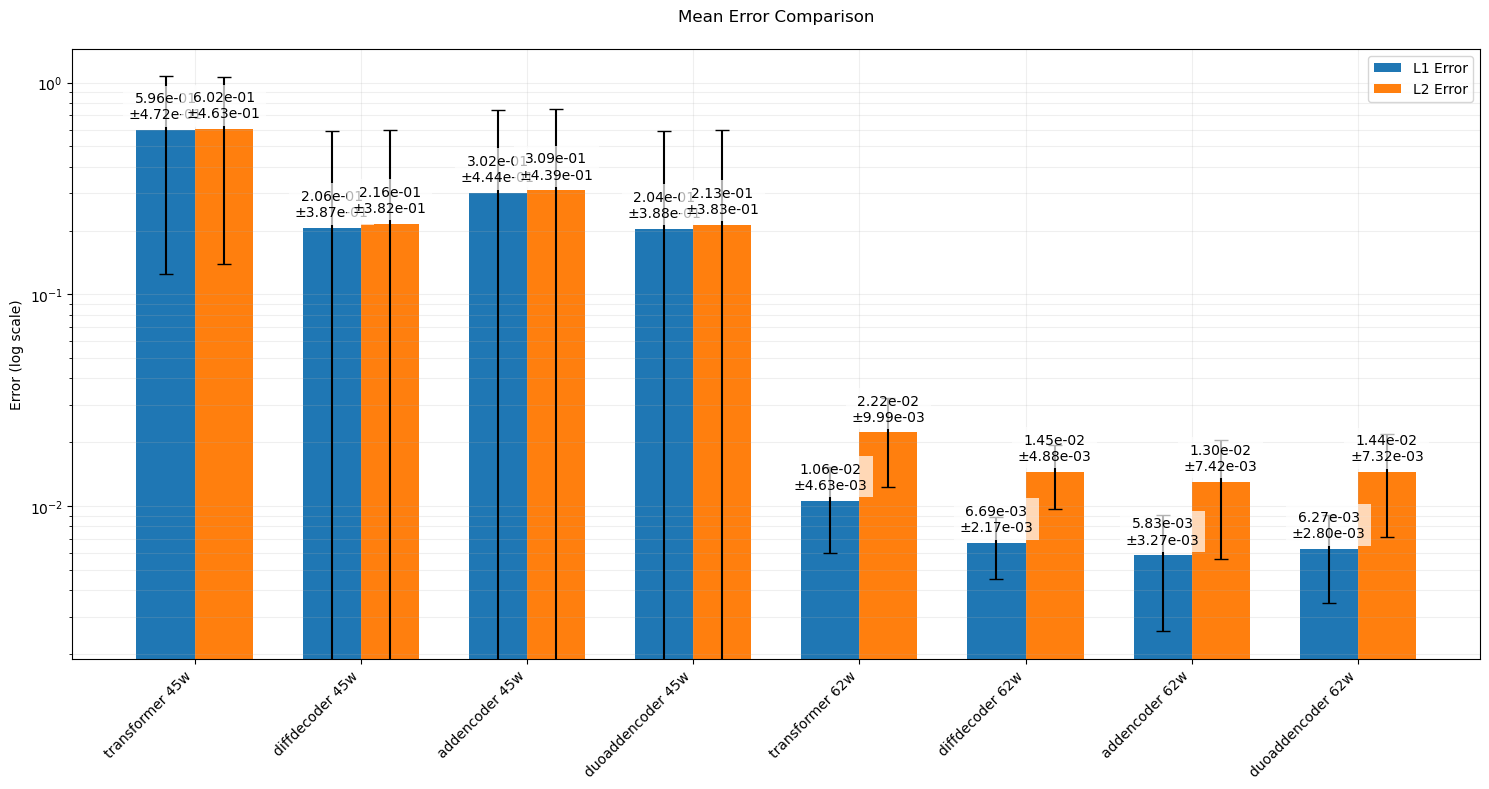


=== 统计结果汇总 ===

transformer 45w:
L1误差 - 均值: 5.960576e-01 ± 4.718580e-01
L2误差 - 均值: 6.024866e-01 ± 4.633585e-01

diffdecoder 45w:
L1误差 - 均值: 2.056356e-01 ± 3.869483e-01
L2误差 - 均值: 2.158076e-01 ± 3.819139e-01

addencoder 45w:
L1误差 - 均值: 3.015505e-01 ± 4.438528e-01
L2误差 - 均值: 3.092222e-01 ± 4.387898e-01

duoaddencoder 45w:
L1误差 - 均值: 2.041763e-01 ± 3.876076e-01
L2误差 - 均值: 2.130194e-01 ± 3.829855e-01

transformer 62w:
L1误差 - 均值: 1.059975e-02 ± 4.629320e-03
L2误差 - 均值: 2.222723e-02 ± 9.992464e-03

diffdecoder 62w:
L1误差 - 均值: 6.687618e-03 ± 2.174901e-03
L2误差 - 均值: 1.453656e-02 ± 4.881705e-03

addencoder 62w:
L1误差 - 均值: 5.833681e-03 ± 3.265674e-03
L2误差 - 均值: 1.302142e-02 ± 7.417195e-03

duoaddencoder 62w:
L1误差 - 均值: 6.268741e-03 ± 2.804845e-03
L2误差 - 均值: 1.442649e-02 ± 7.318939e-03


In [3]:
# 处理数据并创建均值标准差对比图
processed_data = {}
for model_name, model_text in model_errors.items():
    lines = model_text.strip().split('\n')
    for line in lines:
        line = line.strip()
        if "L1 error:" in line:
            l1_data = np.array(eval(line[line.find("["):line.find("]")+1]))
        elif "L2 error:" in line:
            l2_data = np.array(eval(line[line.find("["):line.find("]")+1]))
    processed_data[model_name] = {
        'L1': l1_data,
        'L2': l2_data
    }

# 创建均值和标准差对比图
plt.figure(figsize=(15, 8))
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(processed_data))
width = 0.35

# 计算均值和标准差
means_l1 = [np.mean(data['L1']) for data in processed_data.values()]
stds_l1 = [np.std(data['L1']) for data in processed_data.values()]
means_l2 = [np.mean(data['L2']) for data in processed_data.values()]
stds_l2 = [np.std(data['L2']) for data in processed_data.values()]

# 绘制柱状图
bars1 = ax.bar(x - width/2, means_l1, width, yerr=stds_l1, 
               label='L1 Error', capsize=5)
bars2 = ax.bar(x + width/2, means_l2, width, yerr=stds_l2,
               label='L2 Error', capsize=5)

# 设置对数坐标
ax.set_yscale('log')

# 在柱状图上添加数值标签（使用原始值，不取对数）
def autolabel(rects, stds):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height * 1.1,
               f'{height:.2e}\n±{stds[i]:.2e}',
               ha='center', va='bottom', rotation=0,
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

autolabel(bars1, stds_l1)
autolabel(bars2, stds_l2)

ax.set_ylabel('Error (log scale)')
ax.set_title('Mean Error Comparison', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(list(processed_data.keys()), rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(True, which="both", ls="-", alpha=0.2)

# 调整布局以防止标签被截断
plt.tight_layout()
plt.show()

# 打印详细的统计信息
print("\n=== 统计结果汇总 ===")
for model_name, data in processed_data.items():
    print(f"\n{model_name}:")
    print(f"L1误差 - 均值: {np.mean(data['L1']):.6e} ± {np.std(data['L1']):.6e}")
    print(f"L2误差 - 均值: {np.mean(data['L2']):.6e} ± {np.std(data['L2']):.6e}")

<Figure size 2000x1000 with 0 Axes>

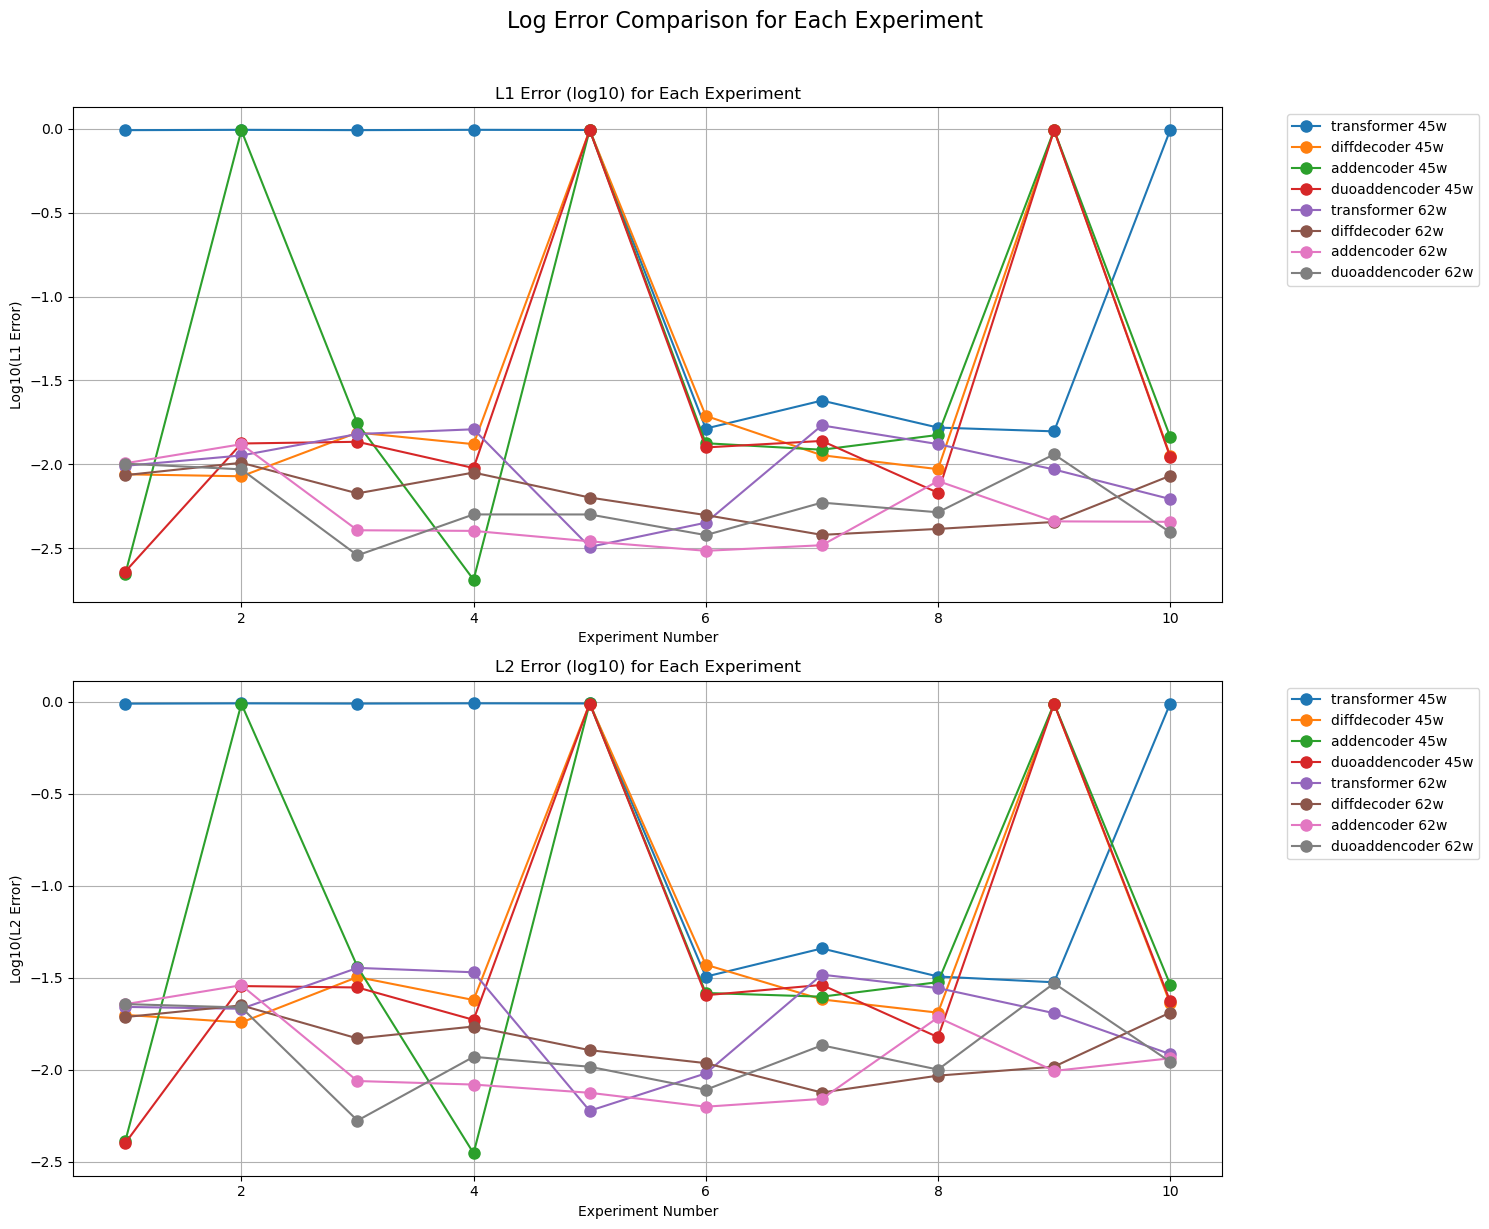

<Figure size 1500x600 with 0 Axes>

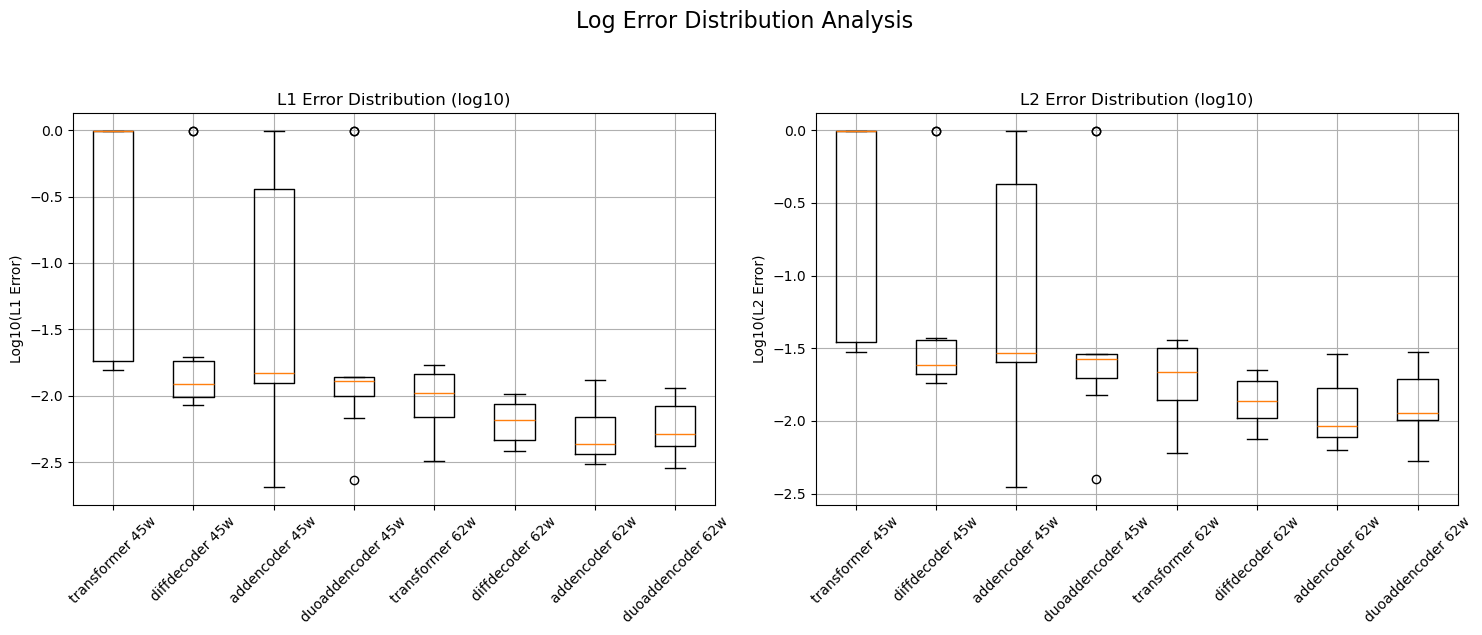

In [4]:
# 创建对数变换后的误差对比折线图
plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Log Error Comparison for Each Experiment', fontsize=16, y=1.02)

# 生成x轴标签（实验次数）
x = np.arange(1, len(next(iter(processed_data.values()))['L1']) + 1)

# 绘制L1误差的对数变换折线图
for model_name, data in processed_data.items():
    log_l1 = np.log10(data['L1'])  # 对数变换
    ax1.plot(x, log_l1, 'o-', label=model_name, markersize=8)
    
ax1.set_title('L1 Error (log10) for Each Experiment')
ax1.set_xlabel('Experiment Number')
ax1.set_ylabel('Log10(L1 Error)')
ax1.grid(True)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 绘制L2误差的对数变换折线图
for model_name, data in processed_data.items():
    log_l2 = np.log10(data['L2'])  # 对数变换
    ax2.plot(x, log_l2, 'o-', label=model_name, markersize=8)
    
ax2.set_title('L2 Error (log10) for Each Experiment')
ax2.set_xlabel('Experiment Number')
ax2.set_ylabel('Log10(L2 Error)')
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 创建对数变换后的箱线图
plt.figure(figsize=(15, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Log Error Distribution Analysis', fontsize=16, y=1.05)

# L1误差箱线图（对数变换）
log_l1_data = [np.log10(data['L1']) for data in processed_data.values()]
bp1 = ax1.boxplot(log_l1_data, labels=list(processed_data.keys()))
ax1.set_title('L1 Error Distribution (log10)')
ax1.set_ylabel('Log10(L1 Error)')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# L2误差箱线图（对数变换）
log_l2_data = [np.log10(data['L2']) for data in processed_data.values()]
bp2 = ax2.boxplot(log_l2_data, labels=list(processed_data.keys()))
ax2.set_title('L2 Error Distribution (log10)')
ax2.set_ylabel('Log10(L2 Error)')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

